In [18]:
#Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [19]:
#verileri cekiyoruz
Data1=pd.read_excel("Iris.xls")

In [20]:
Data1

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
#Veri ögrenecek kolomlarını sonuc kolomlarını ayırıyoruz.
x=Data1.iloc[:,0:4].values
y=Data1.iloc[:,4].values

In [23]:
#Verileri train ve test verileri olarak ayiriyoruz
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [25]:
#Verileri 0 ile 1 arasinda sklaler ediyoruz
from sklearn.preprocessing import StandardScaler

In [26]:

sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

In [27]:
#Verileri logistic regresyon ile eğitip tahmin etiriyoruz
from sklearn.linear_model import LogisticRegression

In [28]:

lr=LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
lrTahmin=lr.predict(X_test)

In [33]:
print("Logistic Regresyon")
confusion_matrix(y_test,lrTahmin)

Logistic Regresyon


array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  2, 13]], dtype=int64)

In [34]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier

In [53]:
kn=KNeighborsClassifier(n_neighbors=5,metric="minkowski")
kn.fit(X_train,y_train)
knTahmin=kn.predict(X_test)

In [55]:
print("KNN ")
confusion_matrix(y_test,knTahmin)

KNN 


array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]], dtype=int64)

In [56]:
#SVC Model
from sklearn.svm import SVC

In [58]:
svc=SVC(kernel="poly")
svc.fit(X_train,y_train)
svcTahmin=svc.predict(X_test)

In [59]:
confusion_matrix(y_test,svcTahmin)

array([[16,  0,  0],
       [ 0, 19,  0],
       [ 0,  6,  9]], dtype=int64)

In [60]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

In [63]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnbTahmin=gnb.predict(X_test)

In [64]:
confusion_matrix(y_test,gnbTahmin)

array([[16,  0,  0],
       [ 0, 19,  0],
       [ 0,  2, 13]], dtype=int64)

In [65]:
#Decision Model (Karar Ağacı)
from sklearn.tree import DecisionTreeClassifier

In [75]:
DTC=DecisionTreeClassifier(criterion="entropy")
DTC.fit(X_train,y_train)
DTCtahmin=DTC.predict(X_test)

In [76]:
confusion_matrix(y_test,DTCtahmin)

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  1, 14]], dtype=int64)

In [77]:
#Random Forest Model (Rassal Orman)
from sklearn.ensemble import RandomForestClassifier

In [146]:
rfc=RandomForestClassifier(n_estimators=5,criterion="entropy")
rfc.fit(X_train,y_train)
rfcTahmin=rfc.predict(X_test)

In [147]:
confusion_matrix(y_test,rfcTahmin)

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 15]], dtype=int64)

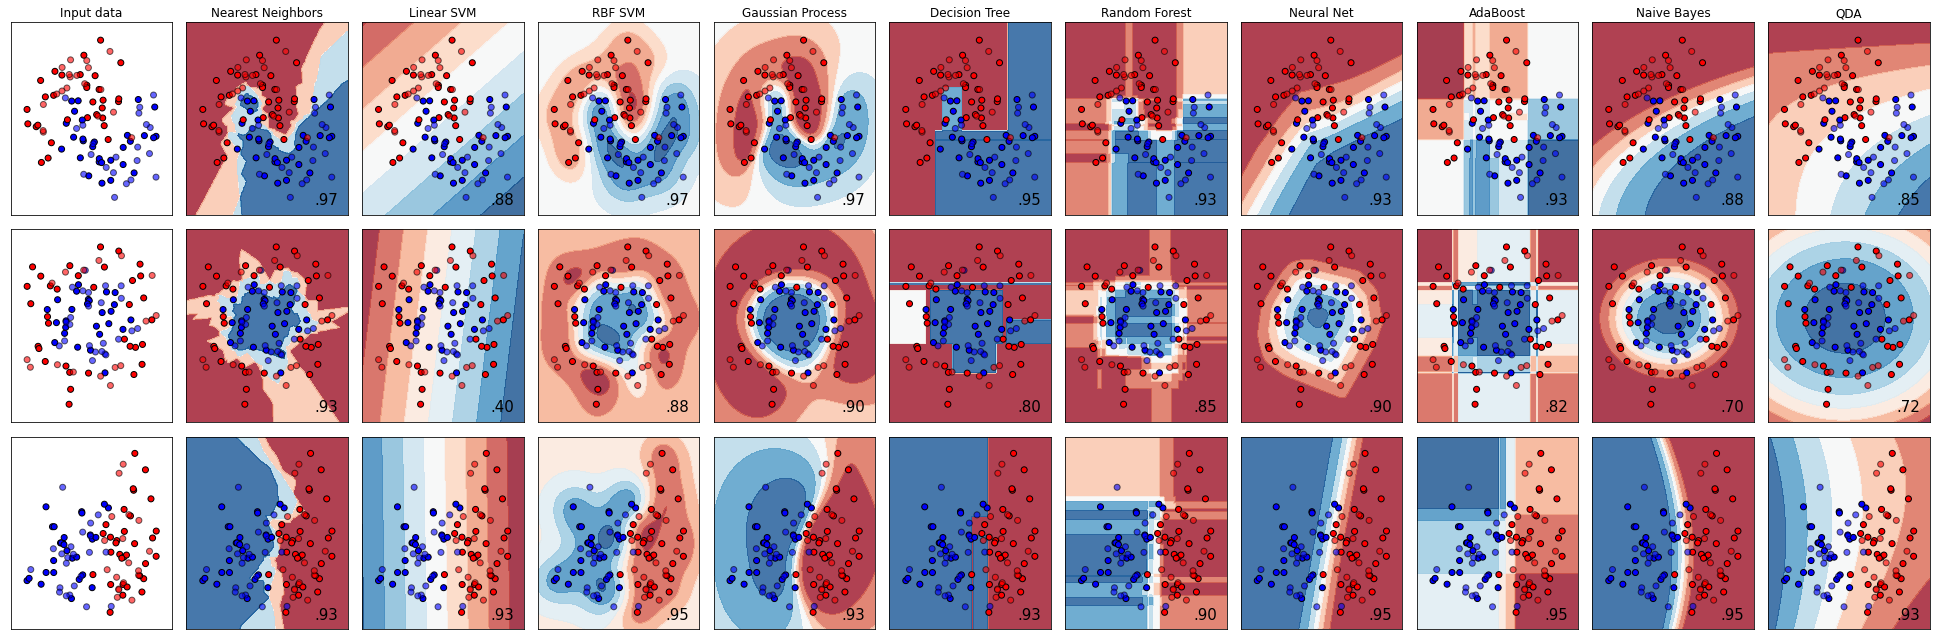

In [16]:
#Modelerin hepsini incelemek için bu projeyle çok bi alakasi yok
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()